# Udacity Machine Learning Capstone Project
## Dogs vs. Cats Redux - Kaggle Compeition

## Load modules

In [11]:
import os
import pickle
import random
import numpy as np
from PIL import Image
from resizeimage import resizeimage
from zipfile import ZipFile
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
print('All modules imported.')

All modules imported.


## Preprocess and Load Data

In [2]:
# Define a function to resize the image to desired dimension
def resize_image(img, size):
    """
    Resize PIL image
    
    Resizes image to be square with sidelength size. Pads with black if needed.
    """
    # Resize
    n_x, n_y = img.size
    if n_y > n_x:
        n_y_new = size
        n_x_new = int(size * n_x / n_y + 0.5)
    else:
        n_x_new = size
        n_y_new = int(size * n_y / n_x + 0.5)

    img_res = img.resize((n_x_new, n_y_new), resample=Image.ANTIALIAS)

    # Pad the borders to create a square image
    img_pad = Image.new('RGB', (size, size), (128, 128, 128))
    #img_pad = Image.new('L', (size, size))
    ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
    img_pad.paste(img_res, ulc)

    return img_pad

In [17]:
# Output size of images 
SIZE = 32


# Unzip, load images and return feature and labels
def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image.load()
                    img = resize_image(image, SIZE)
                    feature = np.array(img, dtype=np.float32)
                # Get the the letter from the filename.  This is the letter of the image.
                label = os.path.split(filename)[1][0:3]
                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Get the features and labels from the zip files
X_train, y_train_string = uncompress_features_labels('train_2500.zip')
# Wait until you see that all features and labels have been uncompressed.
print('All features and labels uncompressed.')

100%|██████████| 2500/2500 [00:23<00:00, 108.40files/s]


All features and labels uncompressed.


In [18]:
# Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ((image_data - grayscale_min)*(b-a))/(grayscale_max - grayscale_min)

X_train = normalize_grayscale(X_train)

In [19]:
# Turn labels into numbers and apply One-Hot Encoding
labels = []
for item in y_train_string:
    if item == 'cat':
        labels.append(1)
    else:
        labels.append(0)
        
y_train = np.array(labels)

In [20]:
# Get randomized datasets for training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=0)

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [21]:
print('Training size is: {}'.format(len(X_train)))
print('Validation size is: {}'.format(len(X_val))) 

Training size is: 2000
Validation size is: 500


## Visualize Image

Updated Image Shape: (32, 32, 3)
1


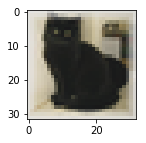

In [34]:
print('Updated Image Shape: {}'.format(X_train[0].shape))
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

## Save Data

In [23]:
# Save the data for easy access
pickle_file = 'DogCat_{0}px_2500.pickle'.format(SIZE)
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': X_train,
                    'train_labels': y_train,
                    'valid_dataset': X_val,
                    'valid_labels': y_val,
                },
                pfile)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.
